In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# To make zero values non zero adding a very small number to specific columns:

In [6]:
df.iloc[:,[1 , 2, 4]] +=0.000001

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895826,54.188351,181.567282,6.204661,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000001,0.000001,121.800000,0.000001,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000001,0.000001,164.900000,0.000001,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000001,0.000001,185.000000,6.400001,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950001,118.300001,192.000000,10.200001,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400001,200.100001,247.000000,32.200001,1145.000000,992.600000,365.000000,82.600000


In [8]:
x = df.iloc[:, 0:8]
y = df.iloc[:, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

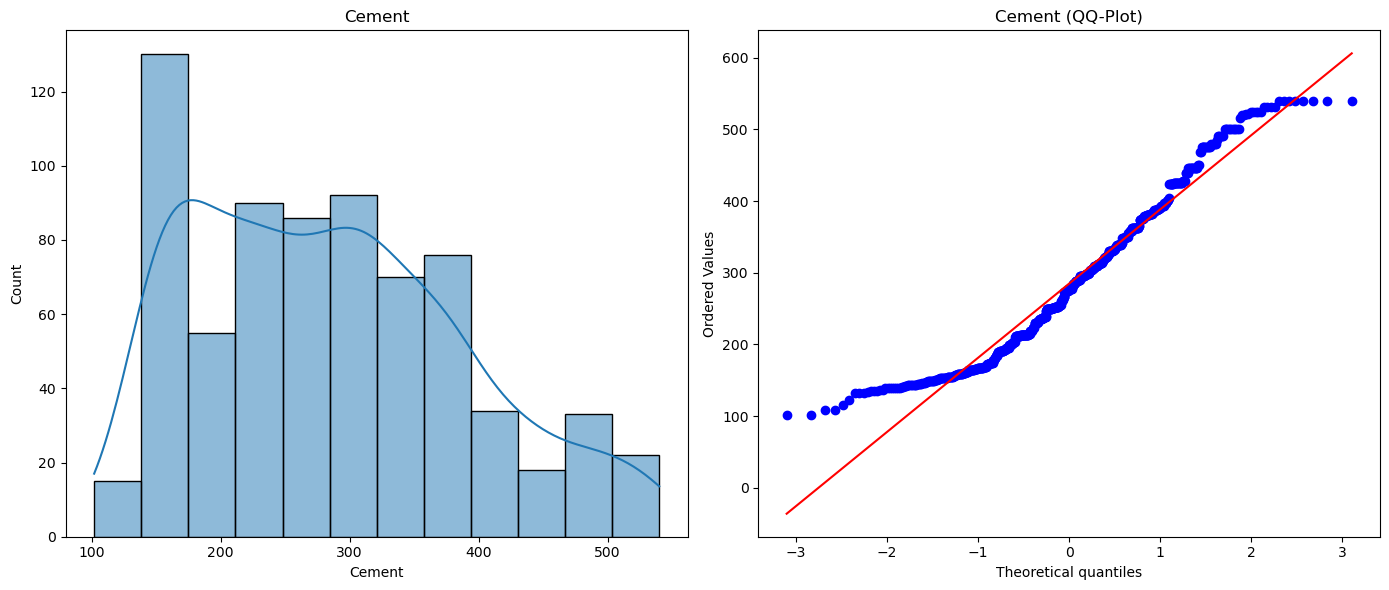

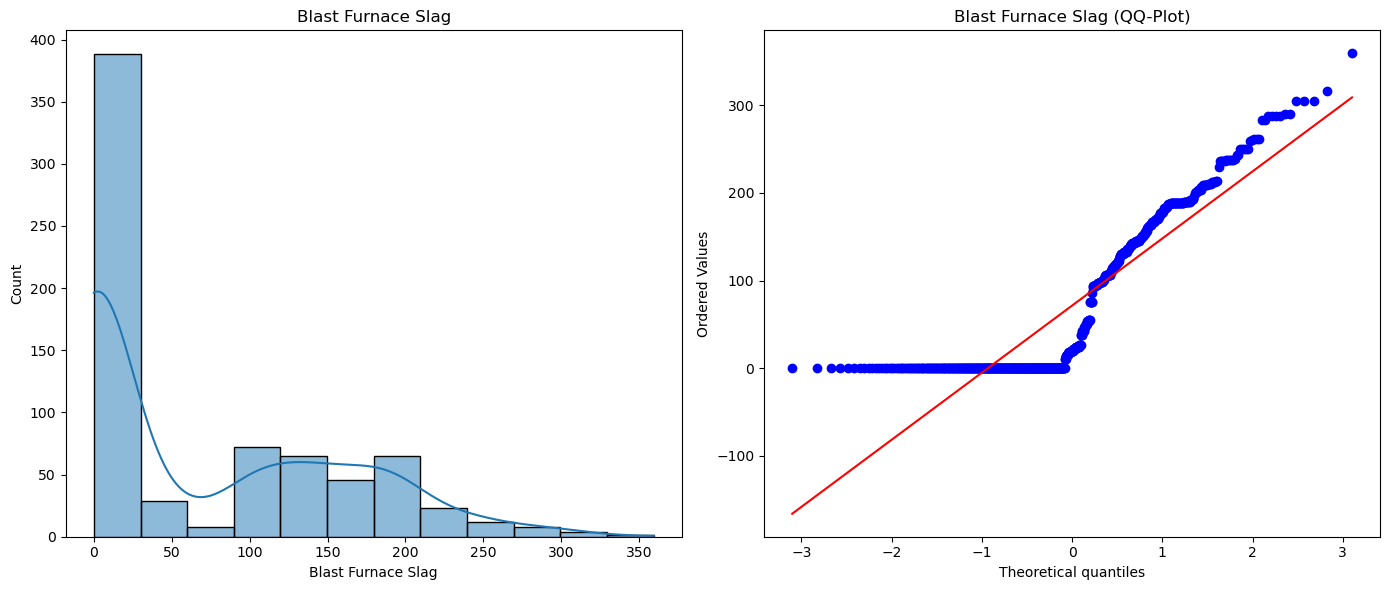

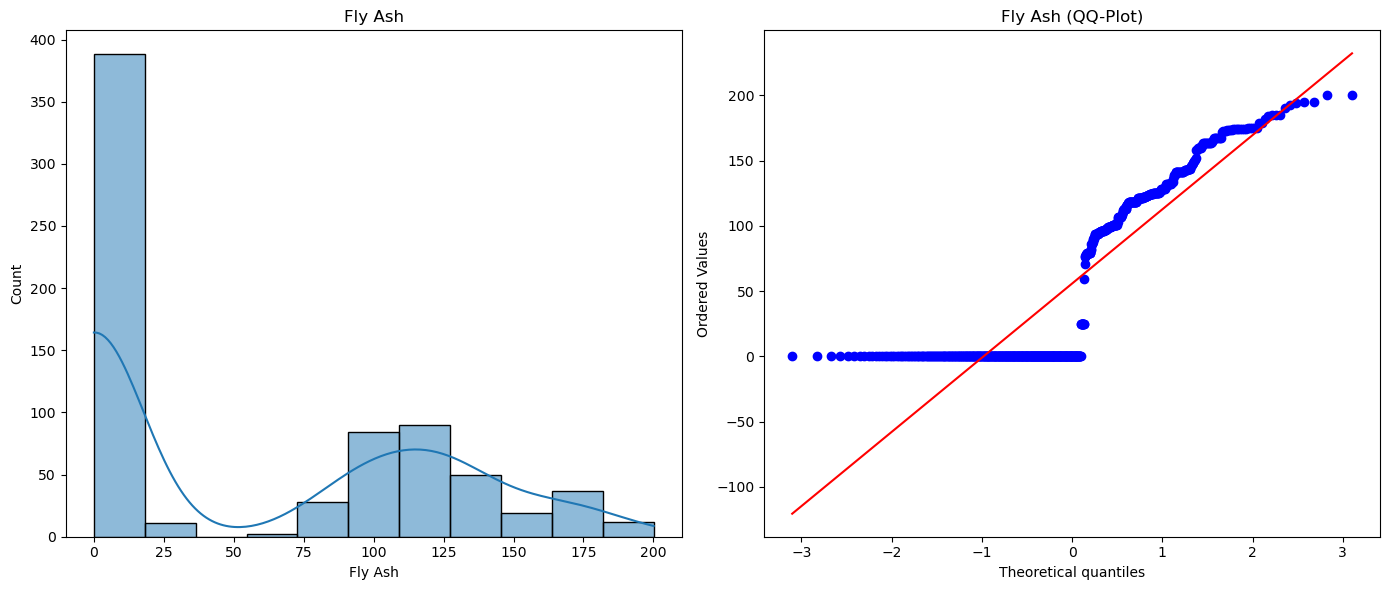

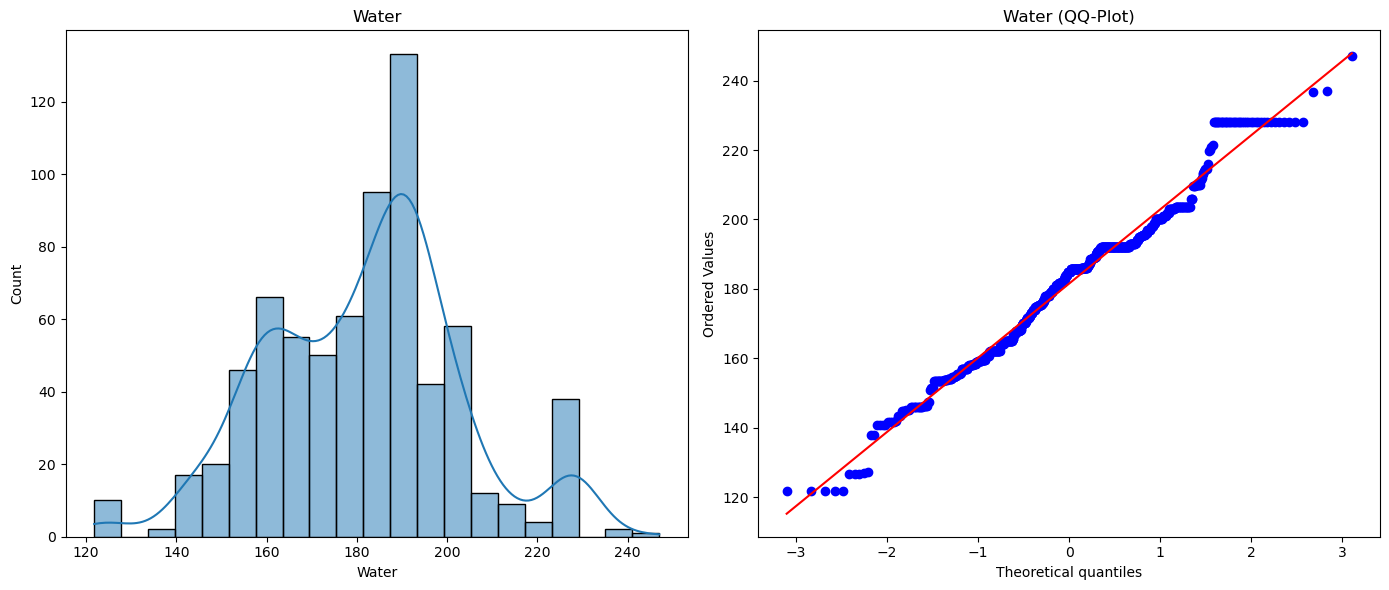

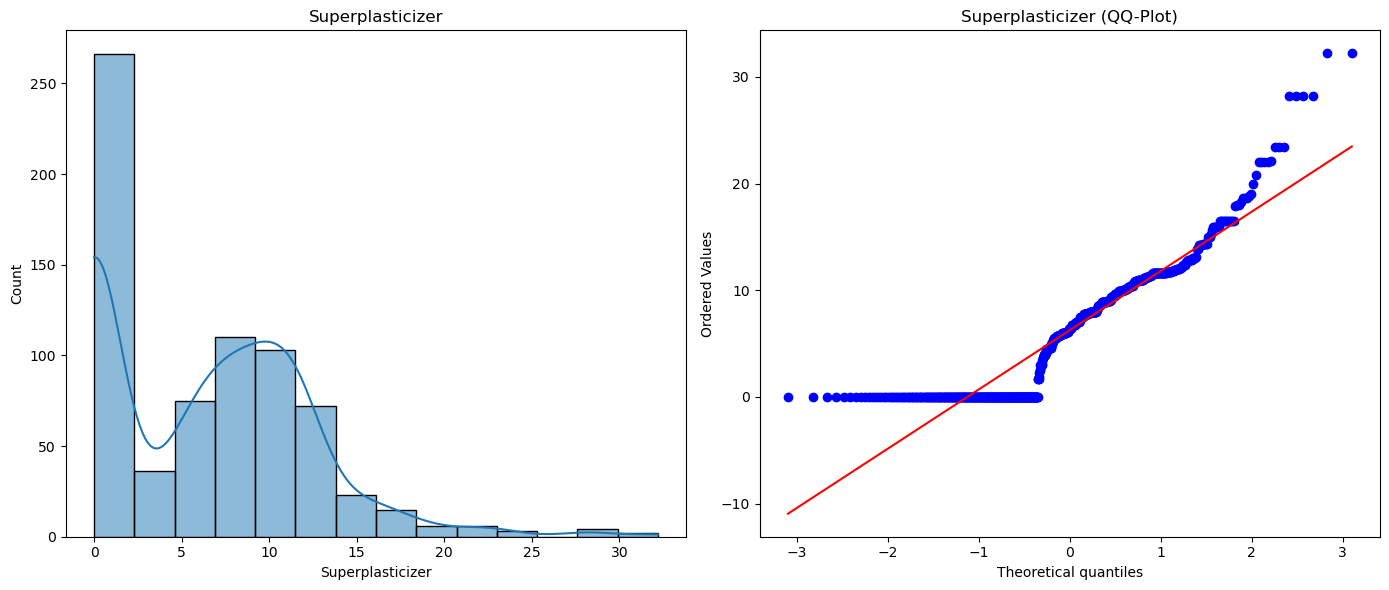

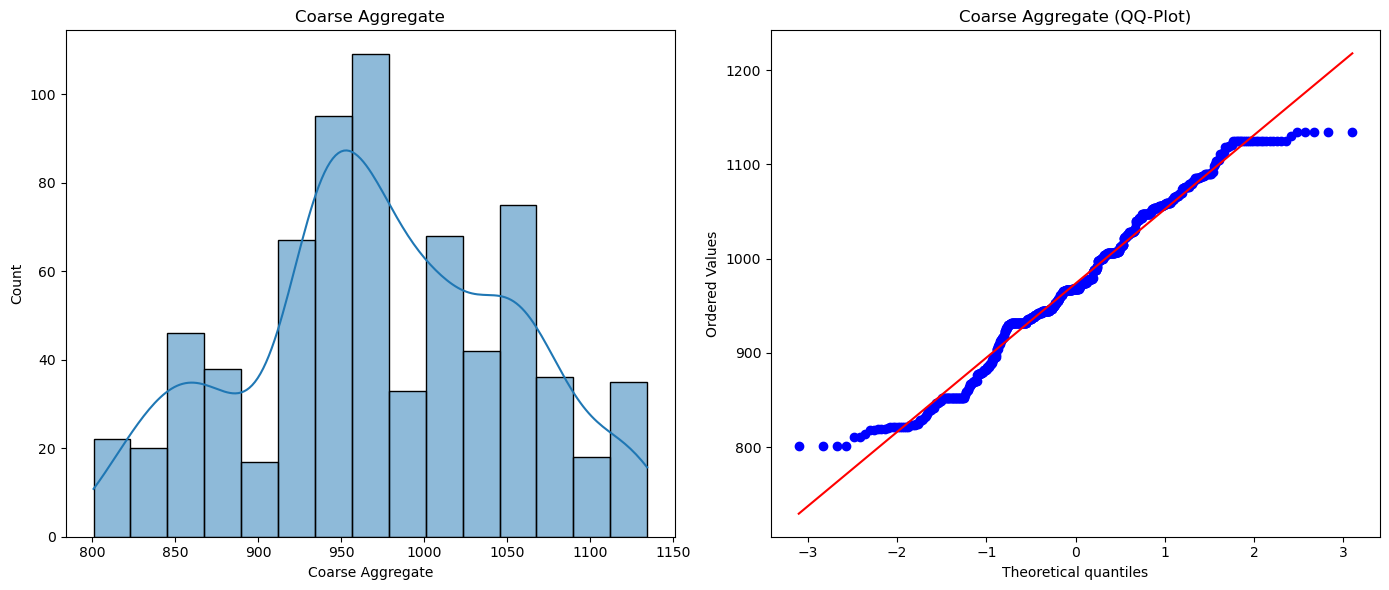

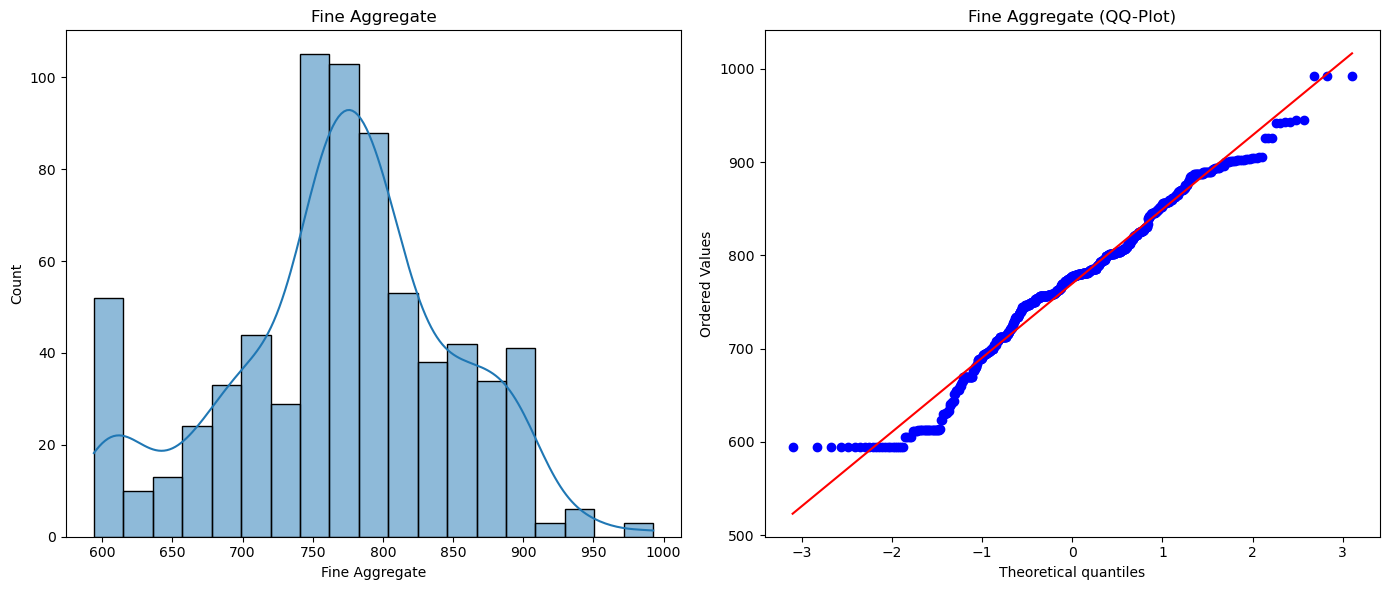

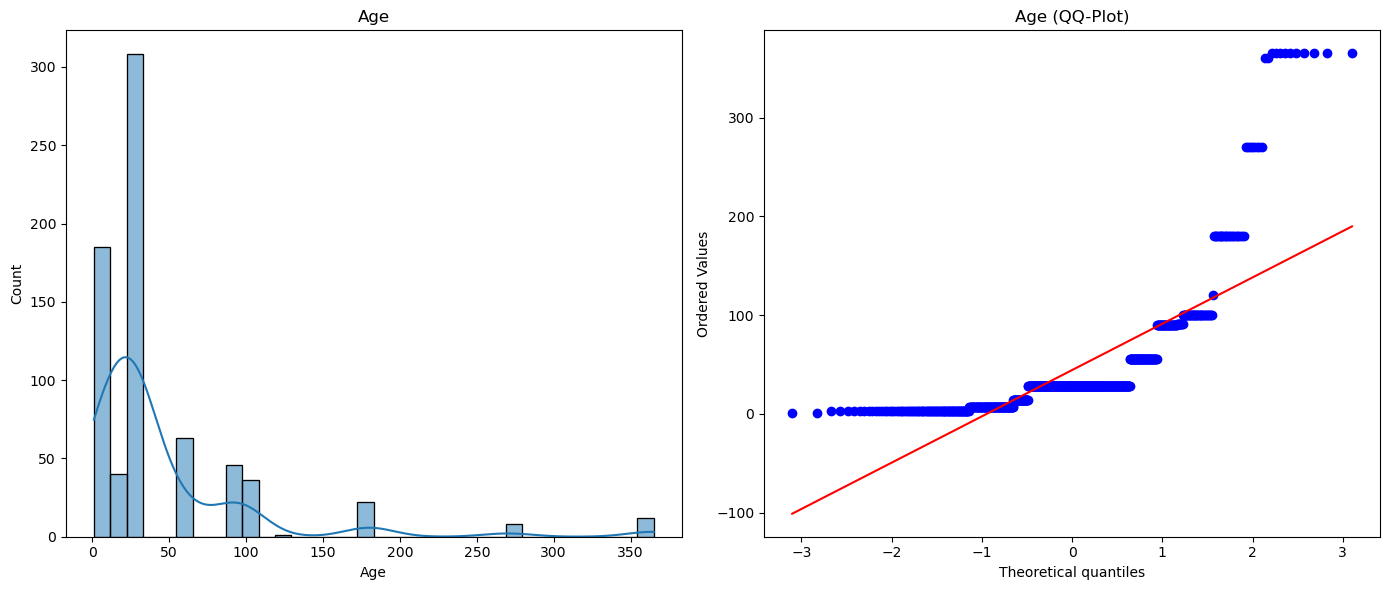

In [10]:
for col in x_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(x_train[col], ax=axes[0], kde=True)
    axes[0].set_title(col)
    

    stats.probplot(x_train[col], plot=axes[1])
    axes[1].set_title(col+" (QQ-Plot)")
    
    plt.tight_layout()

    plt.show()


# box-cox transformation:

In [11]:
pt = PowerTransformer(method = "box-cox")

x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.transform(x_test)

# data after box-cox transformation:

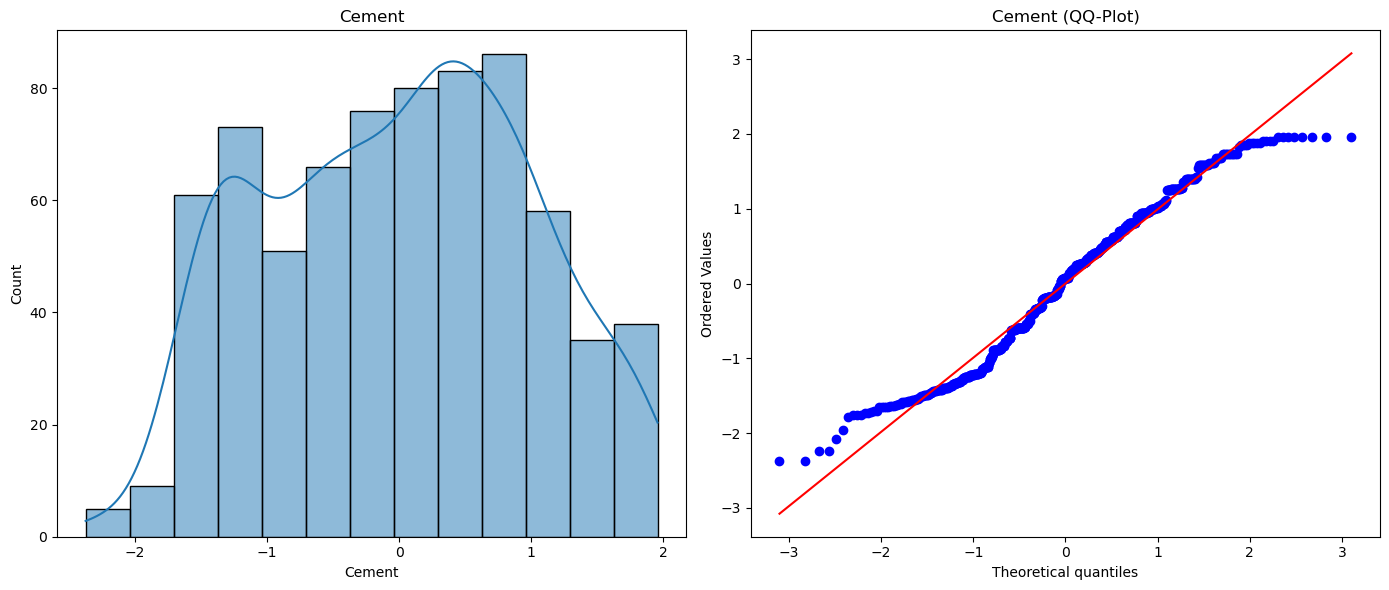

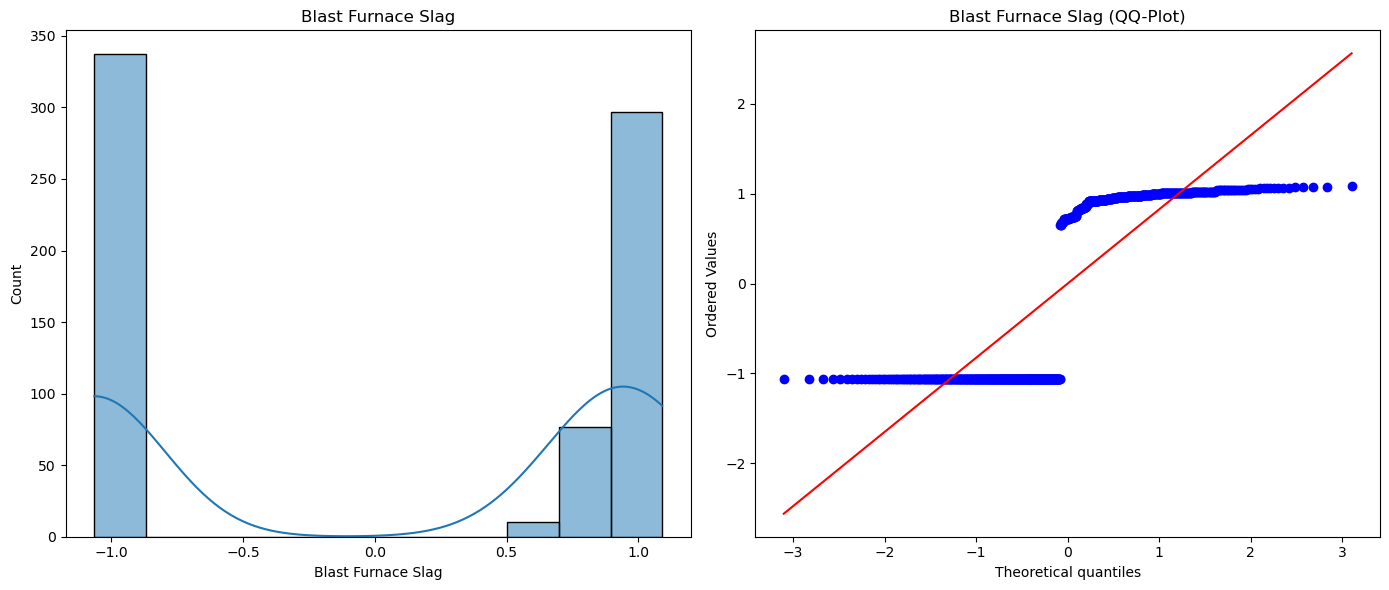

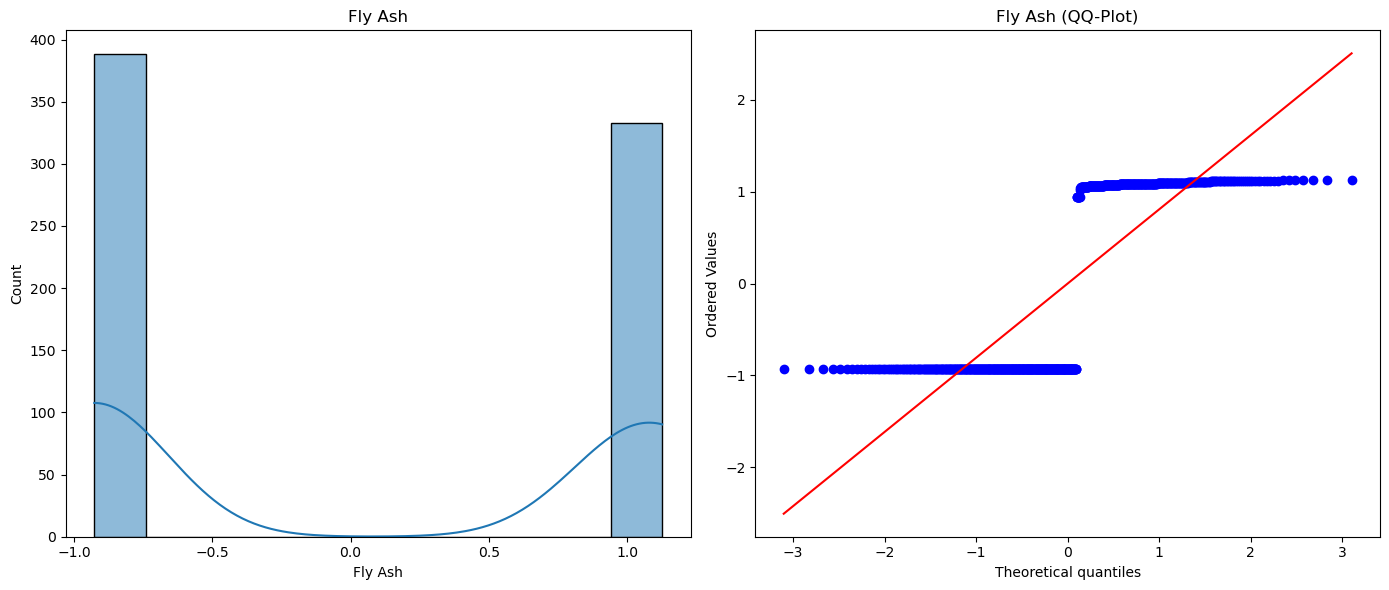

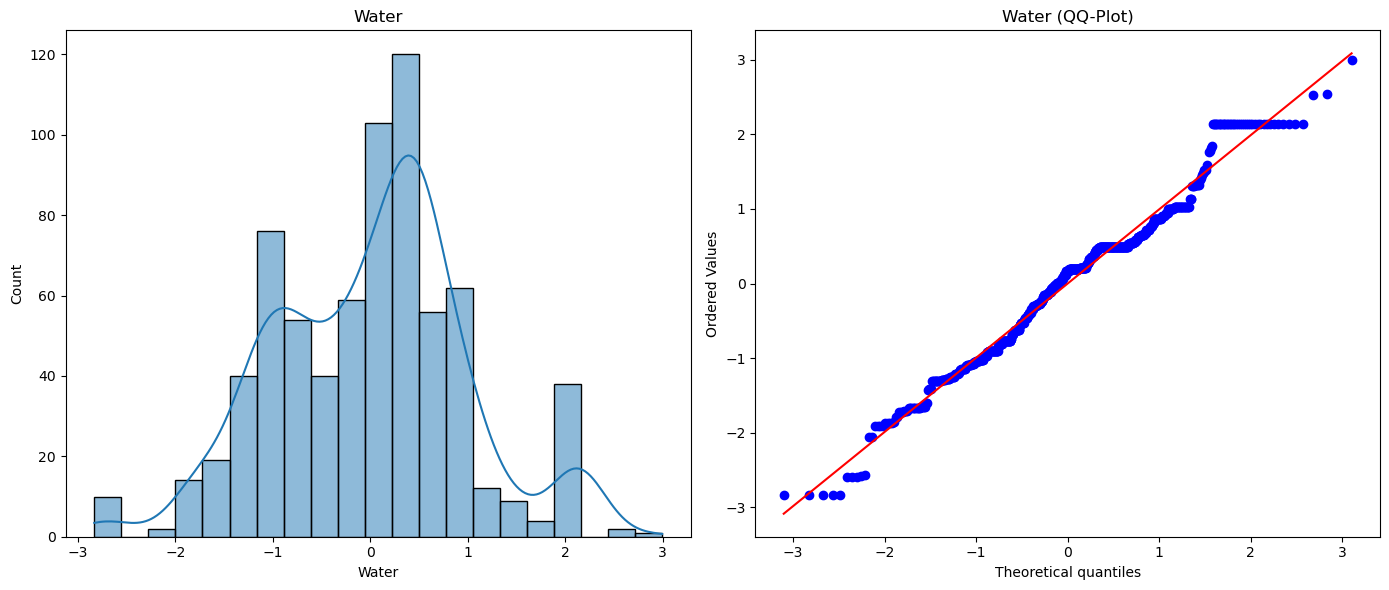

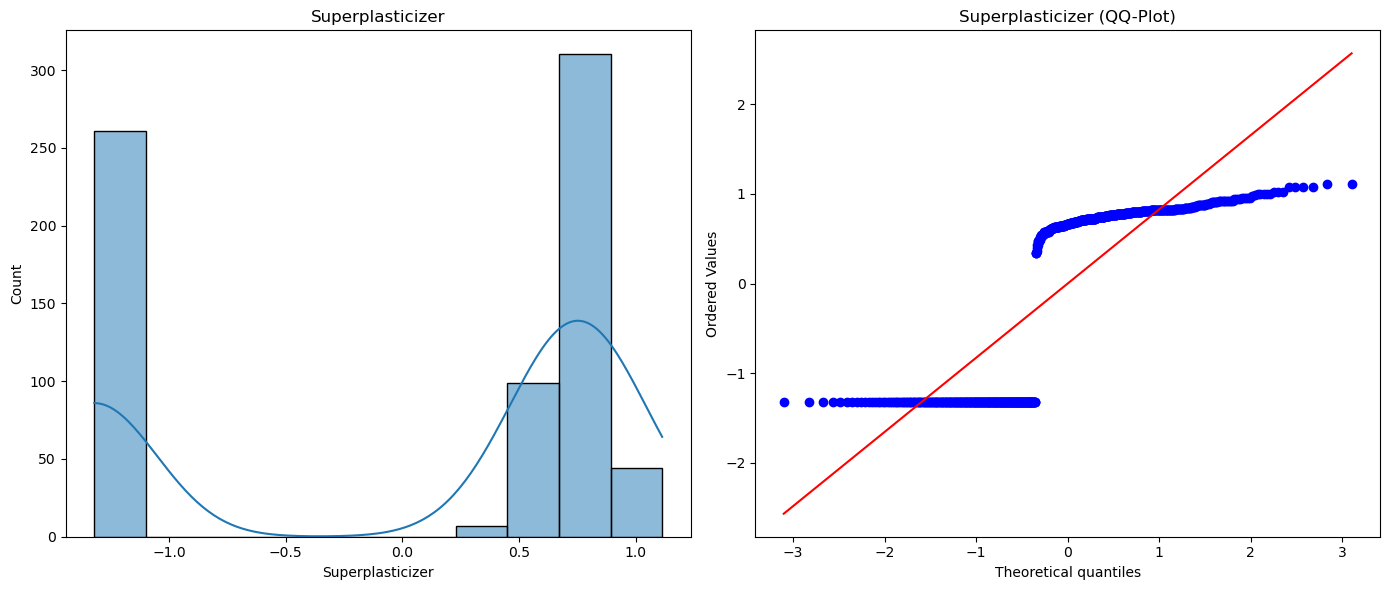

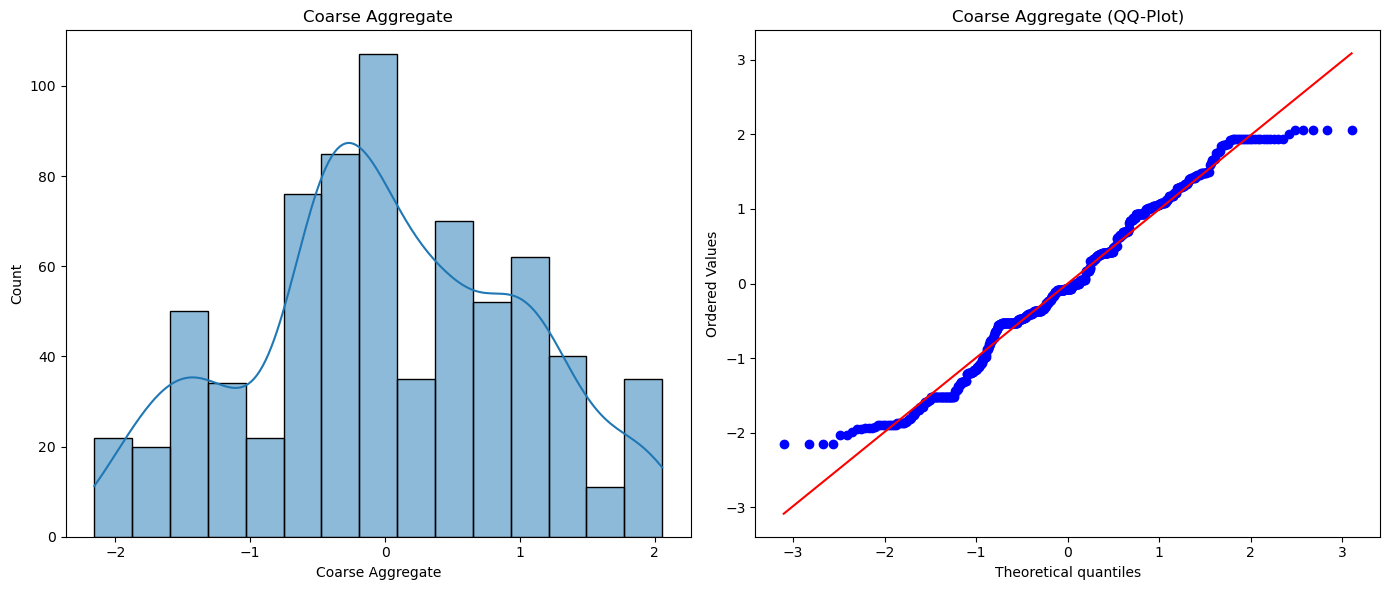

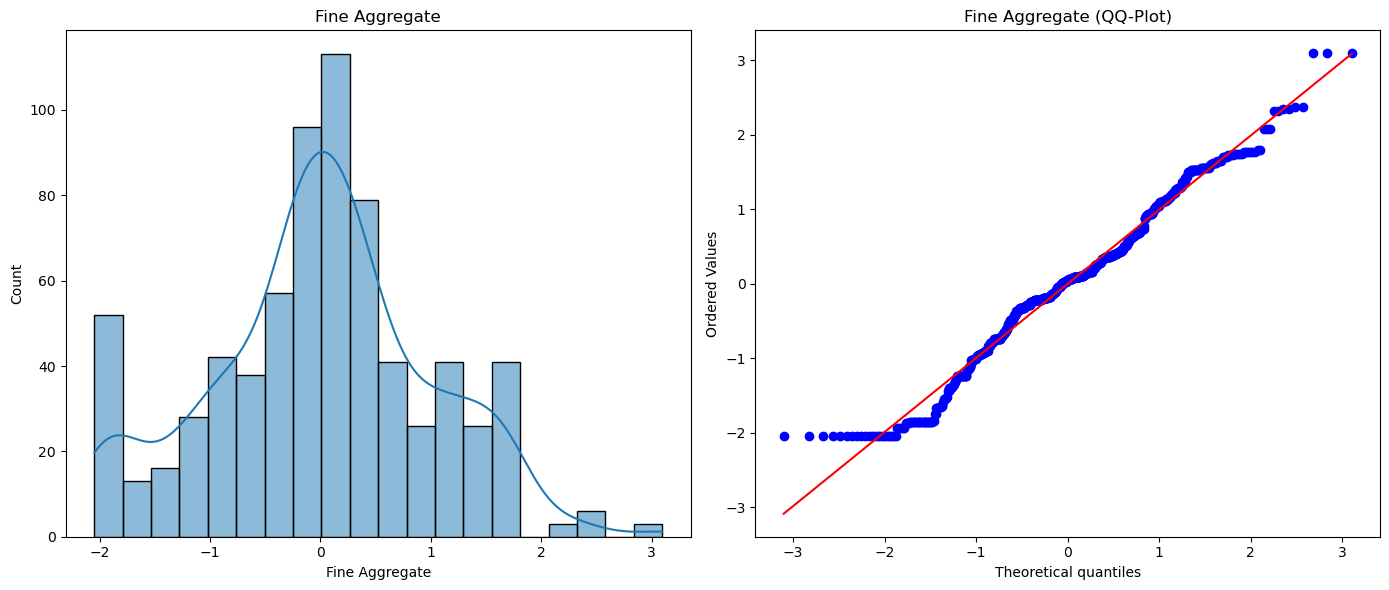

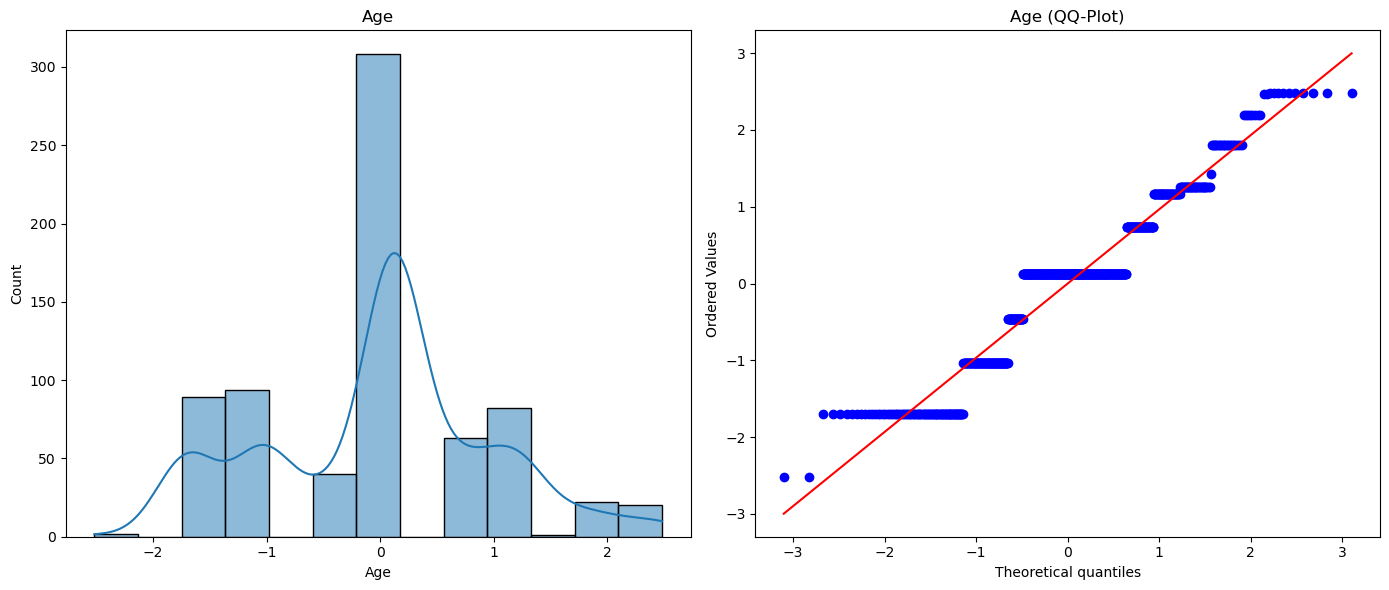

In [12]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

for col in x_train_transformed.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(x_train_transformed[col], ax=axes[0], kde=True)
    axes[0].set_title(col)
    

    stats.probplot(x_train_transformed[col], plot=axes[1])
    axes[1].set_title(col+" (QQ-Plot)")
    
    plt.tight_layout()

    plt.show()


In [13]:
lambdas_box_cox = pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})
lambdas_box_cox

,cols,box_cox_lambdas
0,Cement,0.164918
1,Blast Furnace Slag,0.018837
2,Fly Ash,-0.024985
3,Water,0.883179
4,Superplasticizer,0.104614
5,Coarse Aggregate,1.174204
6,Fine Aggregate,1.820909
7,Age,0.050550


In [14]:
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(x_test_transformed)

/home/toqeer-yasir/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
print(f"Accuracy score: {r2_score(y_test, y_pred)*100}")

Accuracy score: 83.9489770317061


## yeo-johnson transformation:

In [17]:
pt1 = PowerTransformer(method="yeo-johnson")

x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.transform(x_test)

# data after yeo-jhonson transformation:

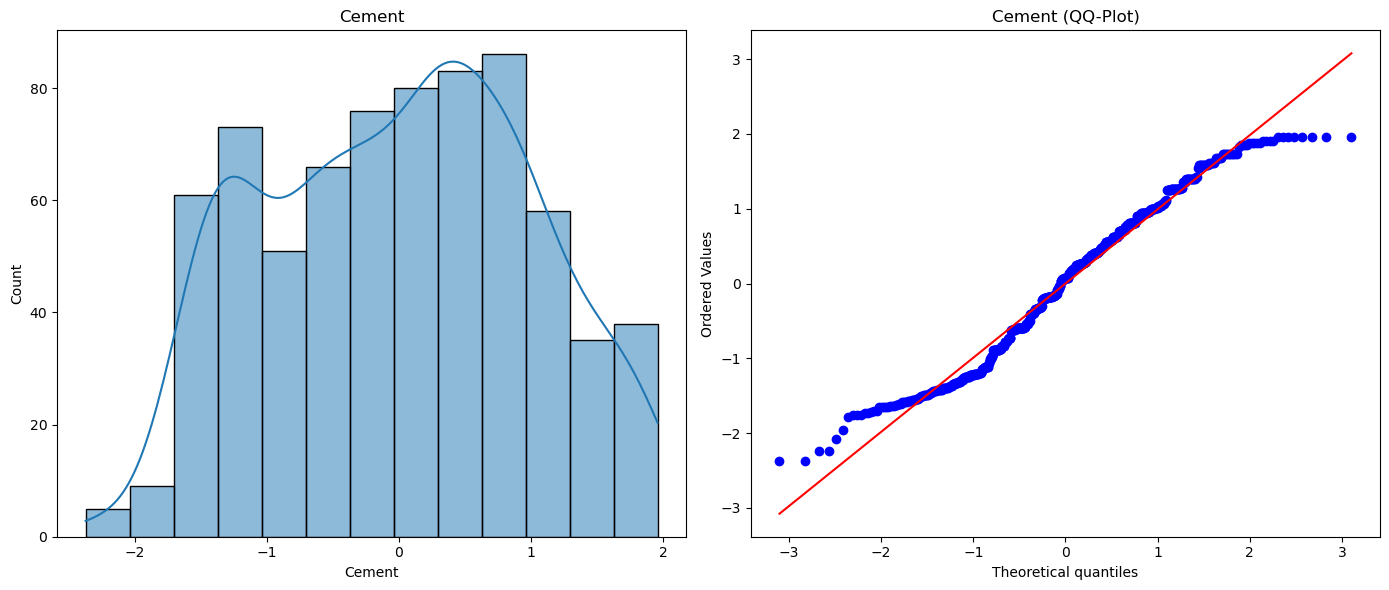

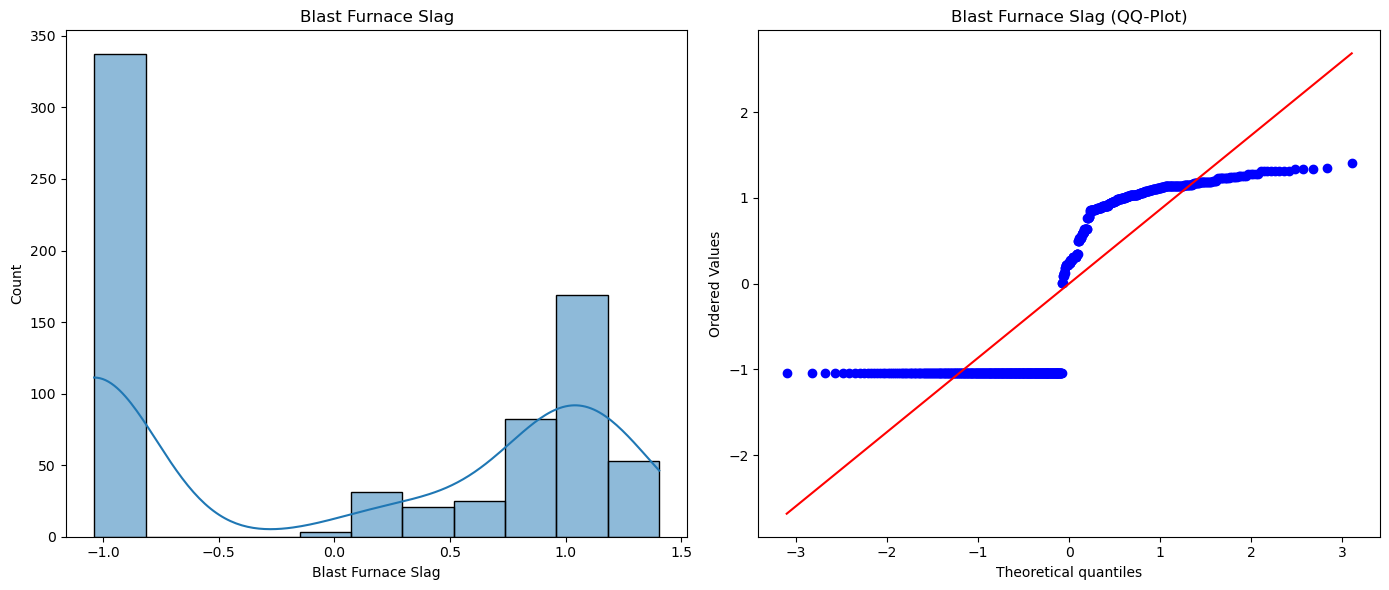

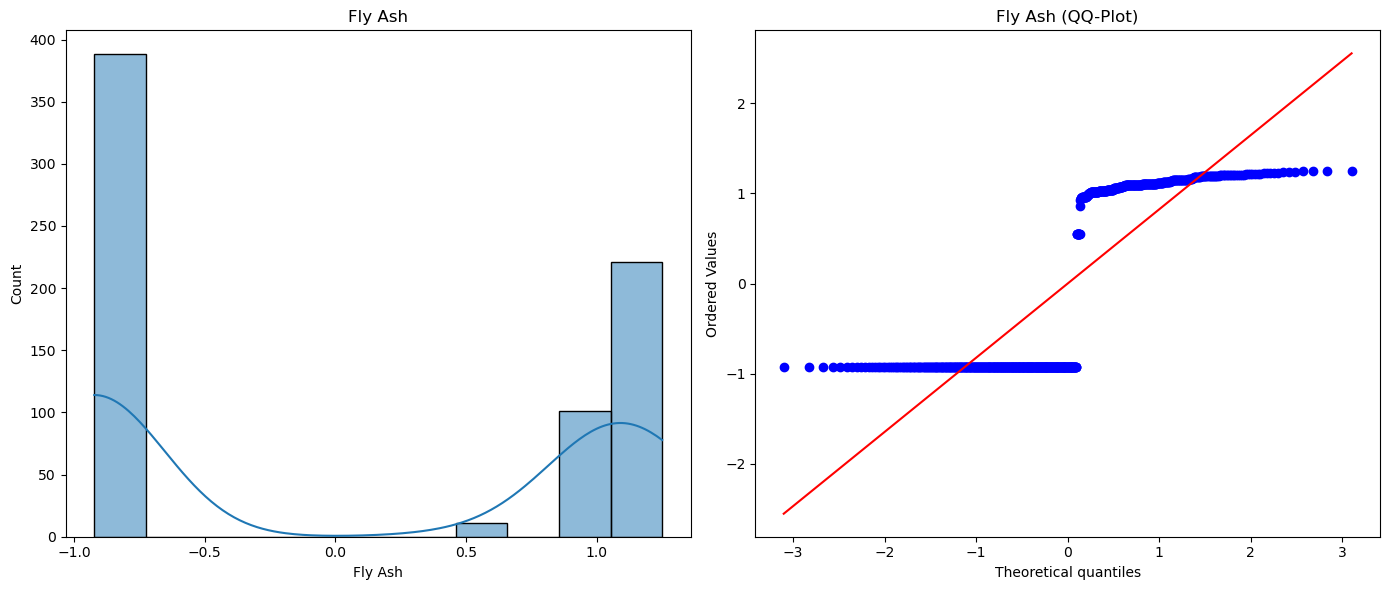

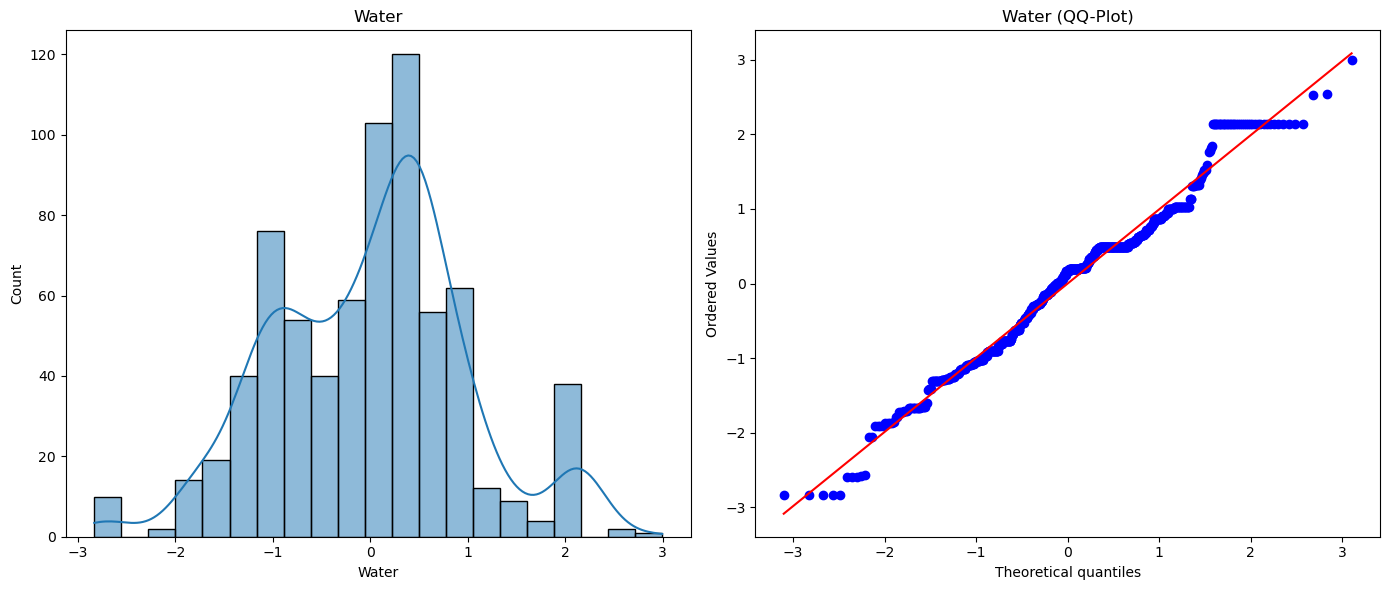

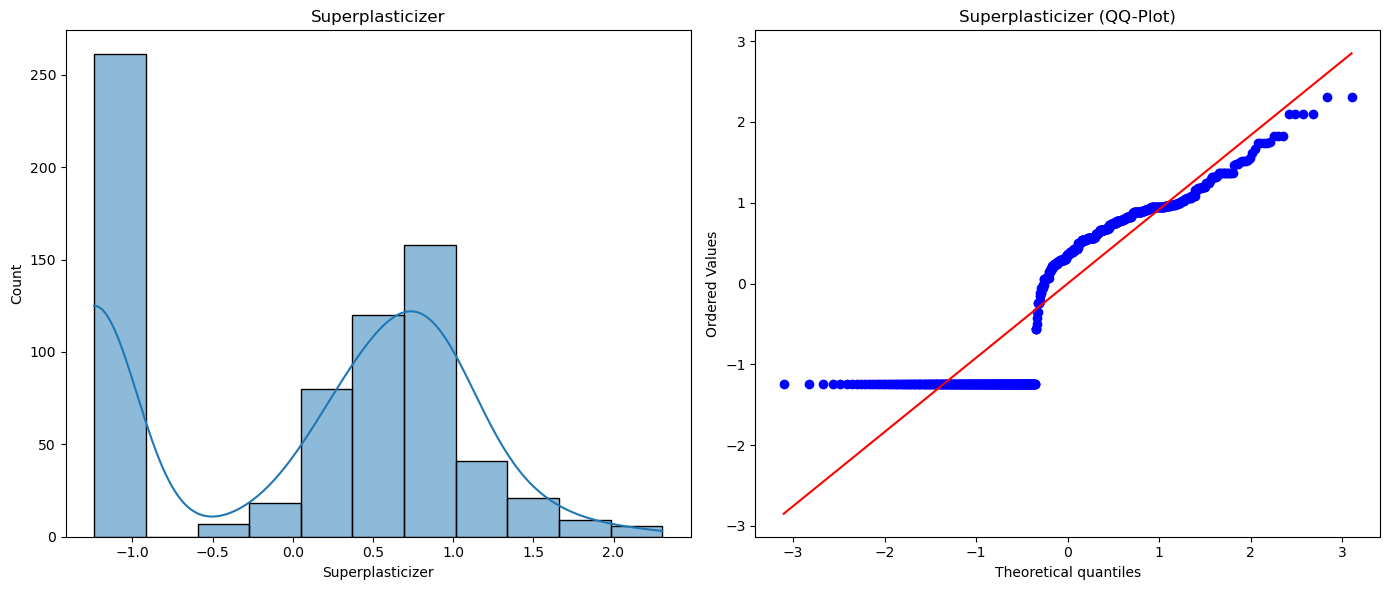

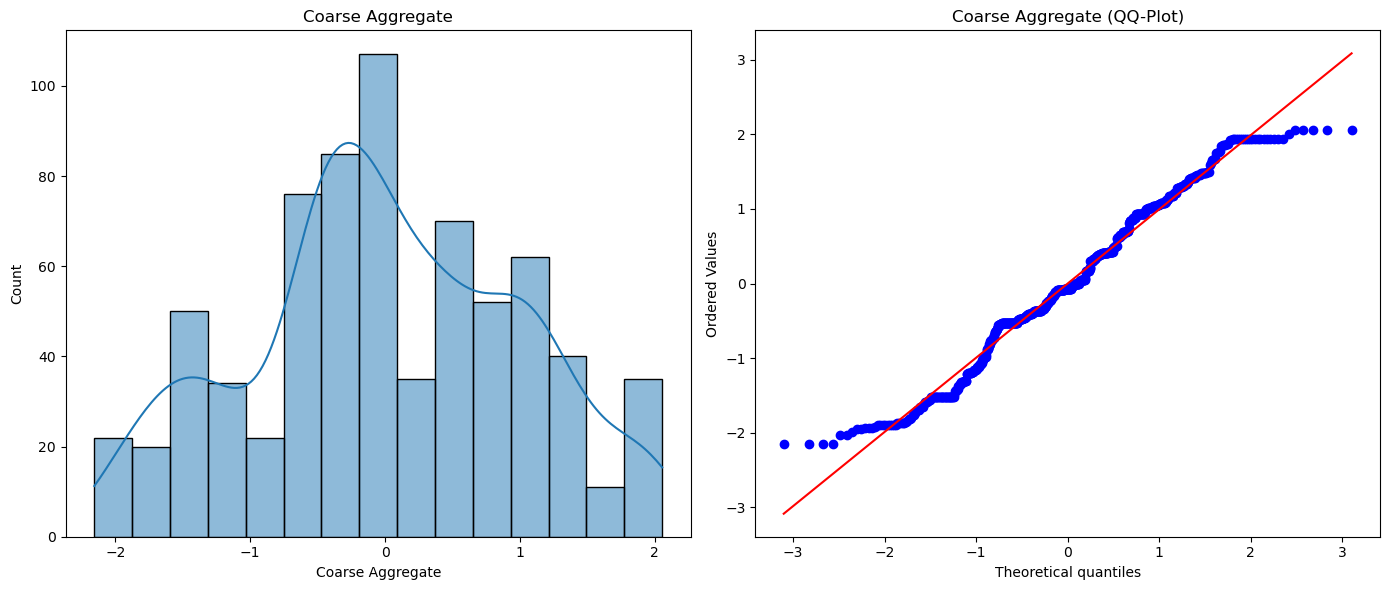

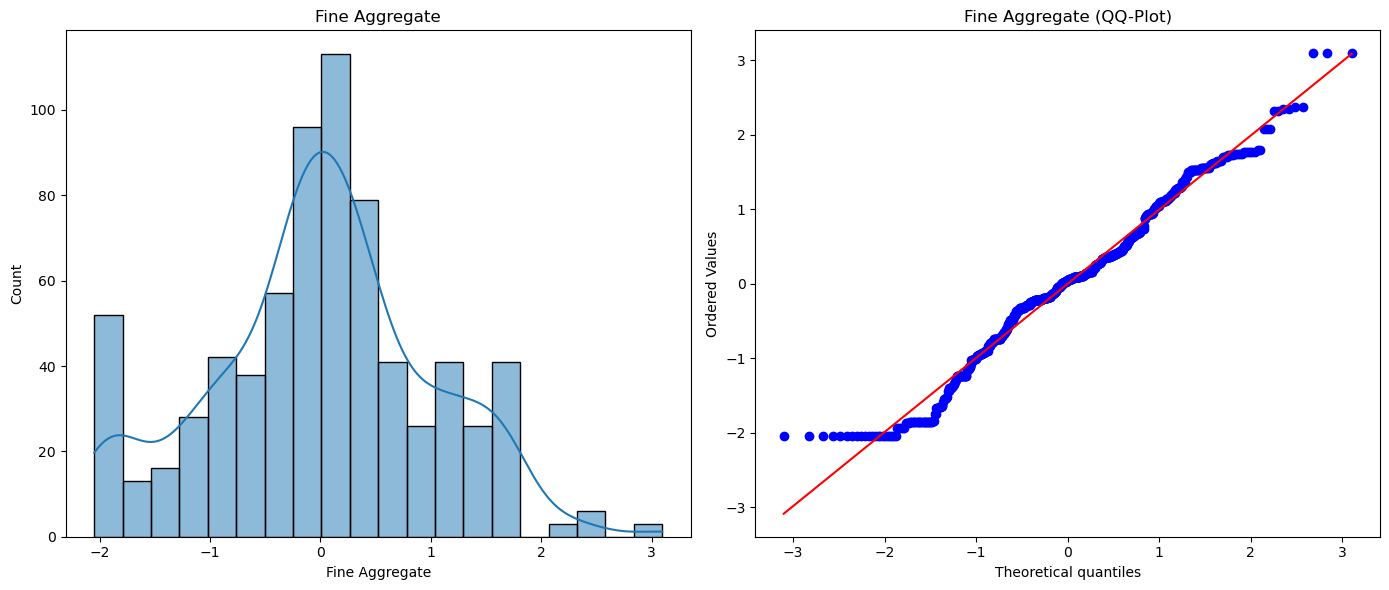

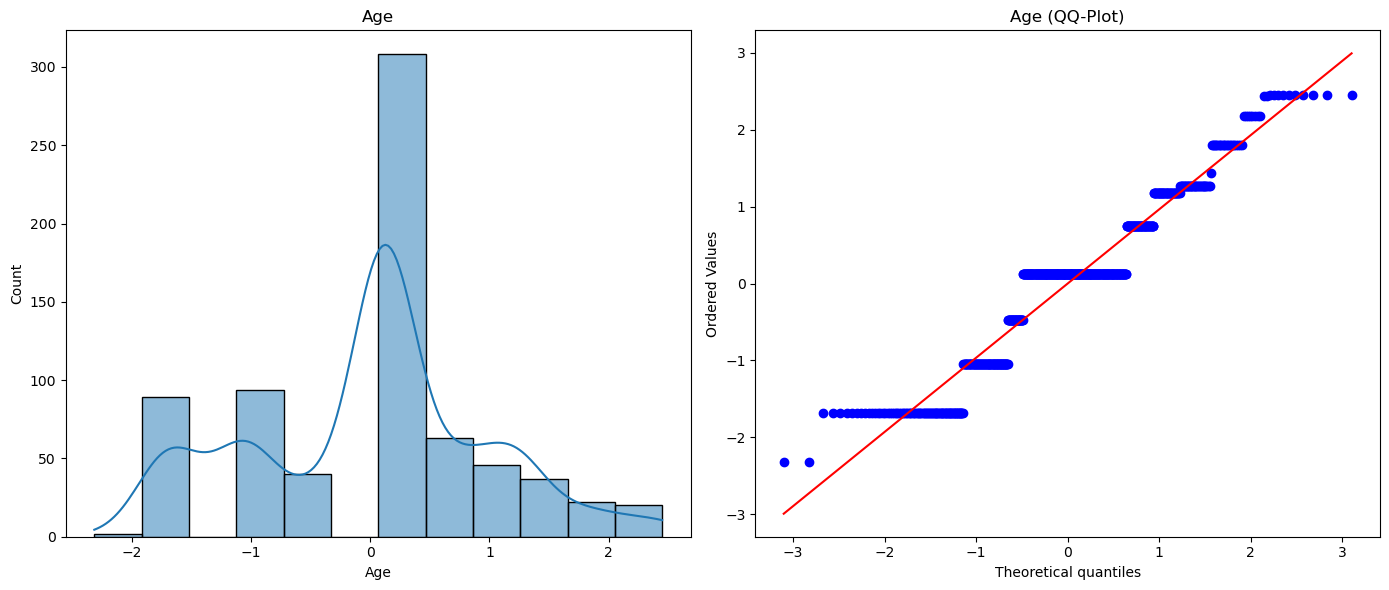

In [18]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

for col in x_train_transformed.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(x_train_transformed[col], ax=axes[0], kde=True)
    axes[0].set_title(col)
    

    stats.probplot(x_train_transformed[col], plot=axes[1])
    axes[1].set_title(col+" (QQ-Plot)")
    
    plt.tight_layout()

    plt.show()


In [19]:
lambdas_yeo_johnson = pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})
lambdas_yeo_johnson

,cols,Yeo_Johnson_lambdas
0,Cement,0.162271
1,Blast Furnace Slag,-0.005434
2,Fly Ash,-0.108955
3,Water,0.882455
4,Superplasticizer,0.286426
5,Coarse Aggregate,1.174481
6,Fine Aggregate,1.822045
7,Age,0.001921


In [20]:
lr = LinearRegression()

lr.fit(x_train_transformed, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test_transformed)

/home/toqeer-yasir/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
print(f"Accuracy score: {r2_score(y_test, y_pred)*100}")

Accuracy score: 84.42076123674941


In [25]:
## comparison lambdas of box-cox and yeo-johnson:

In [26]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.164918,0.162271
1,Blast Furnace Slag,0.018837,-0.005434
2,Fly Ash,-0.024985,-0.108955
3,Water,0.883179,0.882455
4,Superplasticizer,0.104614,0.286426
5,Coarse Aggregate,1.174204,1.174481
6,Fine Aggregate,1.820909,1.822045
7,Age,0.050550,0.001921
